# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='
units  = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url= f'{url}{city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | pico truncado
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | sochi
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | daru
Processing Record 9 of Set 1 | sao jose da coroa grande
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | hayma'
City not found. Skipping...
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | khilok
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | konosha
Proc

Processing Record 39 of Set 4 | thenzawl
Processing Record 40 of Set 4 | queanbeyan
Processing Record 41 of Set 4 | olinda
Processing Record 42 of Set 4 | elk river
Processing Record 43 of Set 4 | tarko-sale
Processing Record 44 of Set 4 | tuba city
Processing Record 45 of Set 4 | greenville
Processing Record 46 of Set 4 | novokruchininskiy
Processing Record 47 of Set 4 | san buenaventura
Processing Record 48 of Set 4 | naze
Processing Record 49 of Set 4 | canchungo
Processing Record 0 of Set 5 | veinticinco de mayo
Processing Record 1 of Set 5 | tsiolkovskiy
City not found. Skipping...
Processing Record 2 of Set 5 | marquette
Processing Record 3 of Set 5 | fort riley north
Processing Record 4 of Set 5 | kailua-kona
Processing Record 5 of Set 5 | lively
Processing Record 6 of Set 5 | anse royale
Processing Record 7 of Set 5 | kwaksan
Processing Record 8 of Set 5 | midvagur
Processing Record 9 of Set 5 | ngaoundere
Processing Record 10 of Set 5 | songjiang
Processing Record 11 of Set 5 

Processing Record 31 of Set 8 | nova prata
Processing Record 32 of Set 8 | colonia
Processing Record 33 of Set 8 | beyla
Processing Record 34 of Set 8 | hadibu
Processing Record 35 of Set 8 | altai
Processing Record 36 of Set 8 | champerico
Processing Record 37 of Set 8 | 'izbat al burj
City not found. Skipping...
Processing Record 38 of Set 8 | pizarro
Processing Record 39 of Set 8 | bengkulu
Processing Record 40 of Set 8 | boali
Processing Record 41 of Set 8 | sorong
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | devonport
Processing Record 45 of Set 8 | carutapera
Processing Record 46 of Set 8 | pozanti
Processing Record 47 of Set 8 | hamada
Processing Record 48 of Set 8 | tommot
Processing Record 49 of Set 8 | villa gesell
Processing Record 0 of Set 9 | darovskoy
Processing Record 1 of Set 9 | kavaratti
Processing Record 2 of Set 9 | khromtau
Processing Record 3 of Set 9 | mbeya
Processing Record 4 of Set 9 | pa

Processing Record 19 of Set 12 | afif
Processing Record 20 of Set 12 | manicore
Processing Record 21 of Set 12 | zijinglu
Processing Record 22 of Set 12 | luau
Processing Record 23 of Set 12 | enterprise
Processing Record 24 of Set 12 | al manzalah
Processing Record 25 of Set 12 | saint-jean-sur-richelieu
Processing Record 26 of Set 12 | cairns city
City not found. Skipping...
Processing Record 27 of Set 12 | salinopolis
Processing Record 28 of Set 12 | minneapolis
Processing Record 29 of Set 12 | greymouth
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | afaahiti
Processing Record 32 of Set 12 | griffith
Processing Record 33 of Set 12 | gwadar
Processing Record 34 of Set 12 | port nelson
Processing Record 35 of Set 12 | satupa'itea
City not found. Skipping...
Processing Record 36 of Set 12 | bubaque
Processing Record 37 of Set 12 | ust-tsilma
Processing Record 38 of Set 12 | mohr
-----------------------------
Data Retrieval Complete      
------------------------

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.16,98,100,7.58,TF,1685303729
1,olonkinbyen,70.9221,-8.7187,0.86,98,100,2.15,SJ,1685303729
2,grytviken,-54.2811,-36.5092,-0.50,89,73,5.84,GS,1685303729
3,pico truncado,-46.7949,-67.9573,8.55,39,70,4.10,AR,1685303730
4,bethel,41.3712,-73.4140,30.10,39,0,2.57,US,1685303731


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.16,98,100,7.58,TF,1685303729
1,olonkinbyen,70.9221,-8.7187,0.86,98,100,2.15,SJ,1685303729
2,grytviken,-54.2811,-36.5092,-0.50,89,73,5.84,GS,1685303729
3,pico truncado,-46.7949,-67.9573,8.55,39,70,4.10,AR,1685303730
4,bethel,41.3712,-73.4140,30.10,39,0,2.57,US,1685303731


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

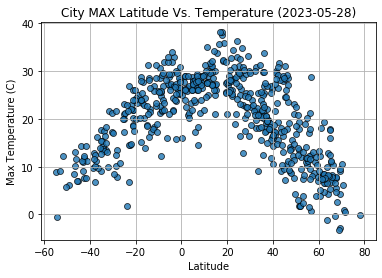

In [30]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(latitude, temp, edgecolor="black", linewidth=0.8, marker="o",alpha=0.8, label="Cities")


# Incorporate the other graph properties
today= datetime.date.today()
plt.title(f'City MAX Latitude Vs. Temperature ({today})')
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

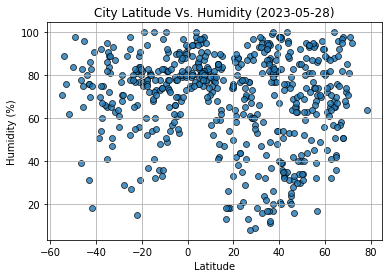

In [32]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity, edgecolor="black", linewidth=0.8, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
today= datetime.date.today()
plt.title(f"City Latitude Vs. Humidity ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

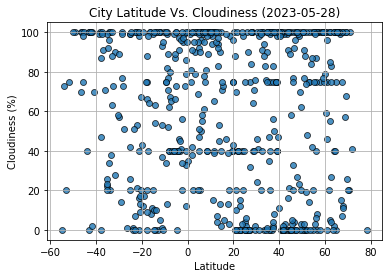

In [33]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness, edgecolor="black", linewidth=0.8, marker="o",alpha=0.8, label="Cities")


# Incorporate the other graph properties
today= datetime.date.today()
plt.title(f"City Latitude Vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

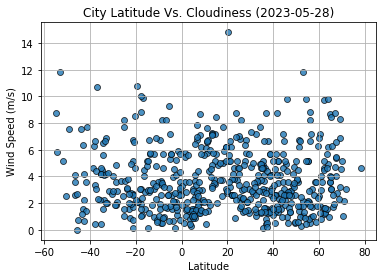

In [34]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
ws = city_data_df["Wind Speed"]

plt.scatter(latitude, ws, edgecolor="black", linewidth=0.8, marker="o",alpha=0.8, label="Cities")


# Incorporate the other graph properties
today= datetime.date.today()
plt.title(f"City Latitude Vs. Cloudiness ({today})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
ws = city_data_df['Wind Speed']

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
Nhemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
Nhemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,0.86,98,100,2.15,SJ,1685303729
4,bethel,41.3712,-73.4140,30.10,39,0,2.57,US,1685303731
5,sochi,43.6000,39.7303,18.05,76,99,1.54,RU,1685303731
6,hawaiian paradise park,19.5933,-154.9731,25.73,76,40,3.09,US,1685303732
9,iskateley,67.6803,53.1512,7.72,51,12,5.39,RU,1685303733


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Shemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
Shemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.16,98,100,7.58,TF,1685303729
2,grytviken,-54.2811,-36.5092,-0.50,89,73,5.84,GS,1685303729
3,pico truncado,-46.7949,-67.9573,8.55,39,70,4.10,AR,1685303730
7,daru,-9.0763,143.2092,24.90,82,99,3.61,PG,1685303732
8,sao jose da coroa grande,-8.8978,-35.1478,25.74,82,82,3.67,BR,1685303732


###  Temperature vs. Latitude Linear Regression Plot

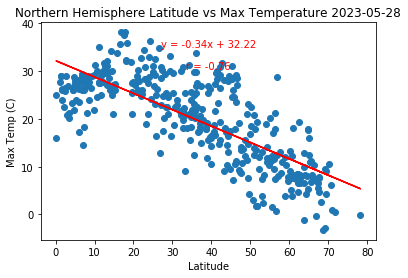

In [47]:
# Linear regression on Northern Hemisphere

# get plotting data
ncity_lat = Nhemi_df['Lat']
ntemp = Nhemi_df['Max Temp']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(ncity_lat, ntemp)
regression_line = slope * ncity_lat + intercept

# Create scatter plot
plt.scatter(ncity_lat, ntemp)
plt.plot(ncity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Max Temperature {today}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

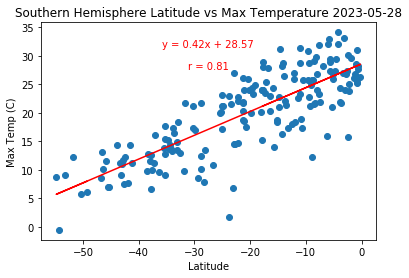

In [48]:
# Linear regression on Southern Hemisphere

# get plotting data
scity_lat = Shemi_df['Lat']
stemp = Shemi_df['Max Temp']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(scity_lat, stemp)
regression_line = slope * scity_lat + intercept

# Create scatter plot
plt.scatter(scity_lat, stemp)
plt.plot(scity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Max Temperature {today}')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

-For the Northern Hemisphere we have a negative correlation of -0.76 between x and y. However we have a positive correlation of 0.81 for the Southern Hemisphere between x and y. 

-The Northern Hemisphere has an R squared of 0.58, this would mean that 58% of the variance of the dependent variable studied would be explained by variance of the independent variable. 

-The Southern Hemisphere has an R squared of 0.66, this would mean that 66% of the variance of the dependent variable studied would be explained by the variance of the independent variable. 


### Humidity vs. Latitude Linear Regression Plot

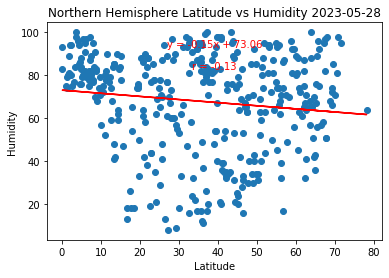

In [46]:
# Northern Hemisphere

# get plotting data
ncity_lat = Nhemi_df['Lat']
nhumi = Nhemi_df['Humidity']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(ncity_lat, nhumi)
regression_line = slope * ncity_lat + intercept

# Create scatter plot
plt.scatter(ncity_lat, nhumi)
plt.plot(ncity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Humidity {today}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

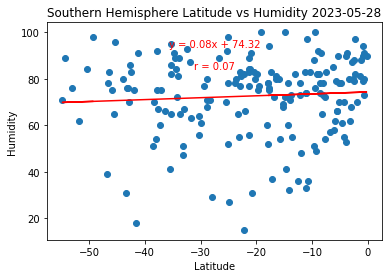

In [50]:
# Southern Hemisphere

# get plotting data
scity_lat = Shemi_df['Lat']
shumi = Shemi_df['Humidity']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(scity_lat, shumi)
regression_line = slope * scity_lat + intercept

# Create scatter plot
plt.scatter(scity_lat, shumi)
plt.plot(scity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Humidity {today}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

-For the Northern Hemisphere we have a negative correlation of -0.13 between x and y. However we have a positive correlation of 0.07 for the Southern Hemisphere between x and y.

-The Northern Hemisphere has an R squared of 0.01, this would mean that 10% of the variance of the dependent variable studied would be explained by variance of the independent variable.

-The Southern Hemisphere has an R squared of 0.0049, this would mean that 0.4% of the variance of the dependent variable studied would be explained by the variance of the independent variable.

-We can conclude that Humidity and Latitude are not related in neither case (Northern and Southern Hemispheres) due to the very low r squared values. 

### Cloudiness vs. Latitude Linear Regression Plot

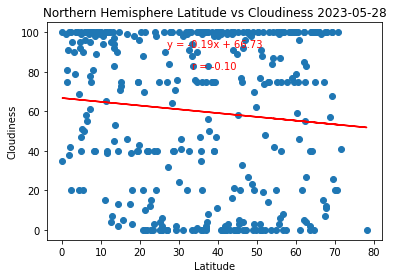

In [51]:
# Northern Hemisphere

# get plotting data
ncity_lat = Nhemi_df['Lat']
ncloud = Nhemi_df['Cloudiness']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(ncity_lat, ncloud)
regression_line = slope * ncity_lat + intercept

# Create scatter plot
plt.scatter(ncity_lat, ncloud)
plt.plot(ncity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Cloudiness {today}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

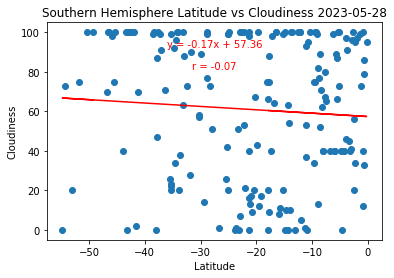

In [52]:
# Southern Hemisphere

# get plotting data
scity_lat = Shemi_df['Lat']
scloud = Shemi_df['Cloudiness']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(scity_lat, scloud)
regression_line = slope * scity_lat + intercept

# Create scatter plot
plt.scatter(scity_lat, scloud)
plt.plot(scity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Cloudiness {today}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

-For the Northern Hemisphere we have a positive correlation of 0.10 between x and y. However, we have a negative correlation of -0.07 for the Southern Hemisphere between x and y.

-We can conclude that Cloudiness and Latitude are not related in neither case (Northern and Southern Hemispheres) due to the very low r squared values. 

### Wind Speed vs. Latitude Linear Regression Plot

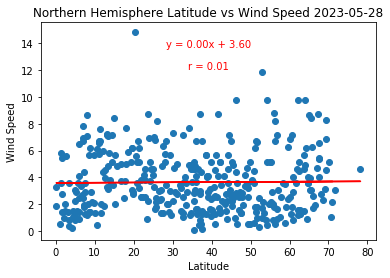

In [53]:
# Northern Hemisphere

# get plotting data
ncity_lat = Nhemi_df['Lat']
nws = Nhemi_df['Wind Speed']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(ncity_lat, nws)
regression_line = slope * ncity_lat + intercept

# Create scatter plot
plt.scatter(ncity_lat, nws)
plt.plot(ncity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Wind Speed {today}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

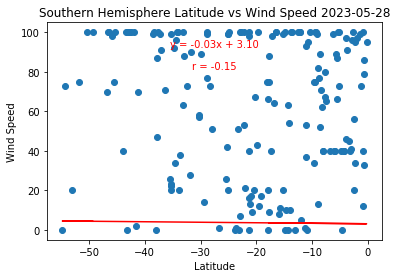

In [54]:
# Southern Hemisphere

# get plotting data
scity_lat = Shemi_df['Lat']
sws = Shemi_df['Wind Speed']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(scity_lat, sws)
regression_line = slope * scity_lat + intercept

# Create scatter plot
plt.scatter(scity_lat, scloud)
plt.plot(scity_lat, regression_line, color='red')

# other graph properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Wind Speed {today}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center',color = 'red', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:**

-For the Northern Hemisphere we have a positive correlation of 0.01 between x and y. However, we have a negative correlation of -0.15 for the Southern Hemisphere between x and y.

-We can conclude that Wind Speed and Latitude are not related in neither case (Northern and Southern Hemispheres) due to the very low r squared values. 